# Bibliotecas

In [ ]:
#Incluir bibliotecas
import math
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from pandas.core.internals.base import final
from numpy.lib.function_base import extract


# Constantes

In [ ]:

G = 9.80665 #Gravidade
M = 0.179/G #Massa do celular
K = 0.006839897405357749 #Coeficiente para atrito do Ar

# Funções

In [ ]:
#Declaração de funções e variáveis
def printSeparador():
  print("\n\n====================================================================\n\n")
  
def extractSVTrajectory(svt,i):
    foo = np.array(svt)
    return(foo[:,i])

# Baixa e imprime os dados

Text(0.5, 1.0, 'Physics Toolbox - Dados do Acelerômetro do Pendulo 1 - TgF')

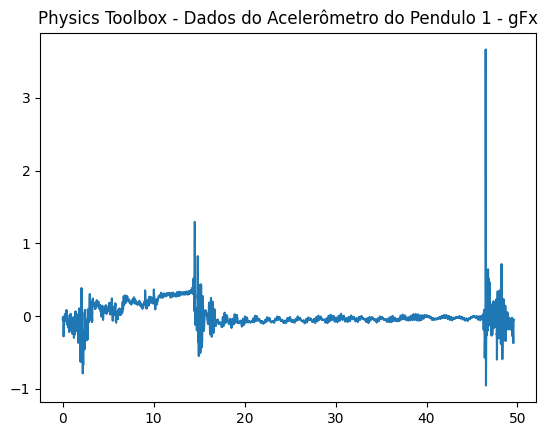

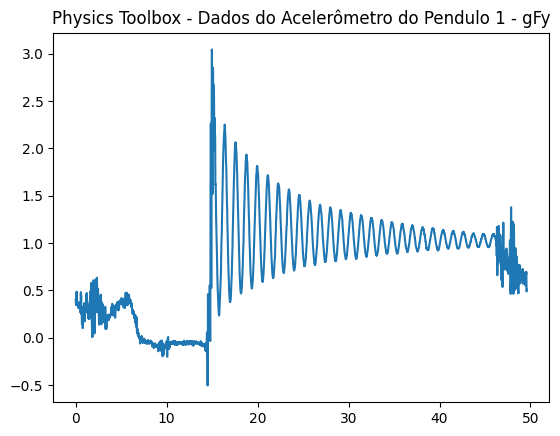

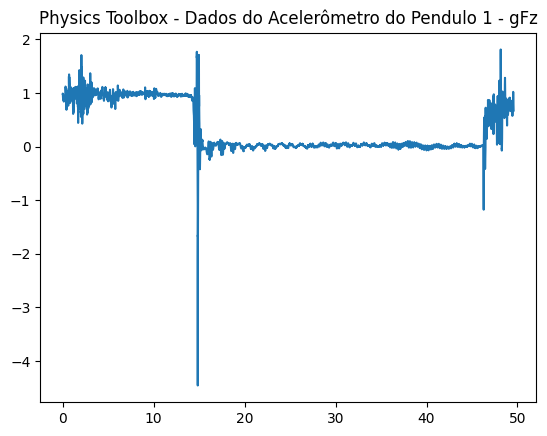

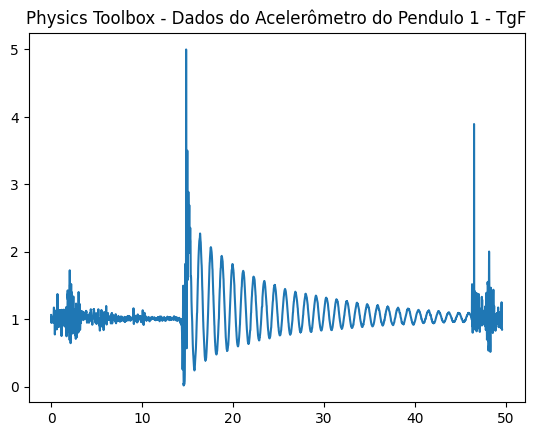

In [ ]:

url = 'https://raw.githubusercontent.com/felipe-rms/ModSim/372994632d9aa6b05577e7b6e4348fe5ee586cdd/ep1/Pendulo/medida5.csv'
data = pd.read_csv(url, sep=',', encoding='utf-8')
data = np.array(data)

plt.figure()
plt.plot(data[:,0],data[:,1])
plt.title("Physics Toolbox - Dados do Acelerômetro do Pendulo 1 - gFx")

plt.figure()
plt.plot(data[:,0],data[:,2])
plt.title("Physics Toolbox - Dados do Acelerômetro do Pendulo 1 - gFy")

plt.figure()
plt.plot(data[:,0],data[:,3])
plt.title("Physics Toolbox - Dados do Acelerômetro do Pendulo 1 - gFz")

plt.figure()
plt.plot(data[:,0],data[:,4])
plt.title("Physics Toolbox - Dados do Acelerômetro do Pendulo 1 - TgF")

# Encontra os picos no gráfico

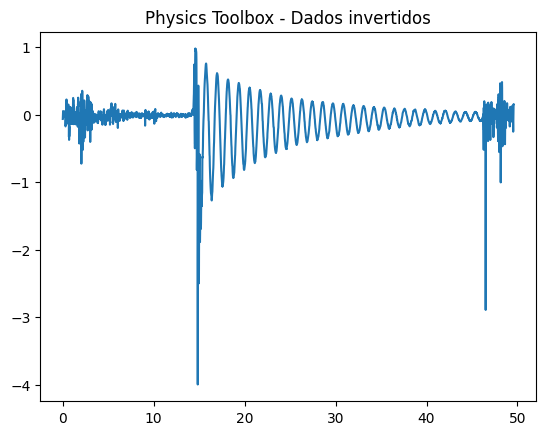

In [ ]:
tempo = data[:,0]

#inverter para achar o primeiro pico
invertido = data - [0, 1, 1, 1, 1]
invertido *= [0, -1, -1, -1, -1]
plt.figure()
plt.plot(tempo,invertido[:,4])
plt.title("Physics Toolbox - Dados invertidos")
plt.show()

#Encontrando peaks
peaks, _ = find_peaks(invertido[:,4], distance=150, height=0.7, prominence=0.01)
inicio = peaks[0]
fim = inicio + 12000

# Extrair os dados do acerelômetro gerado com PhisicsToolbox

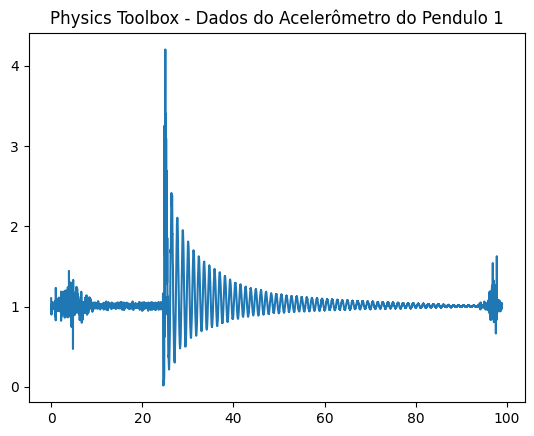

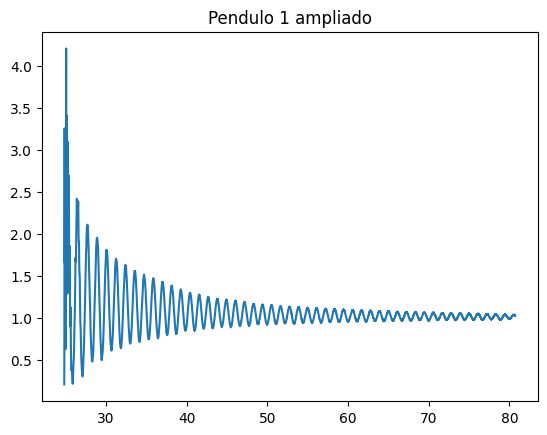

1.025


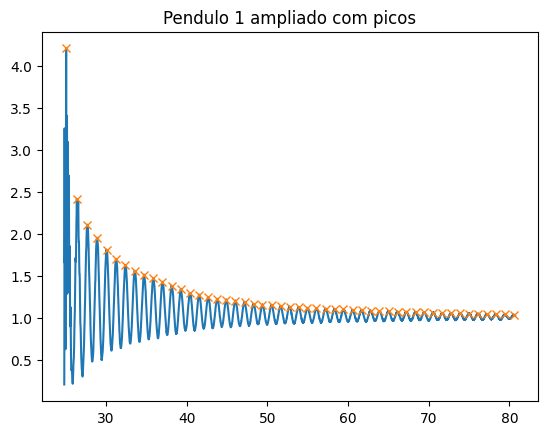

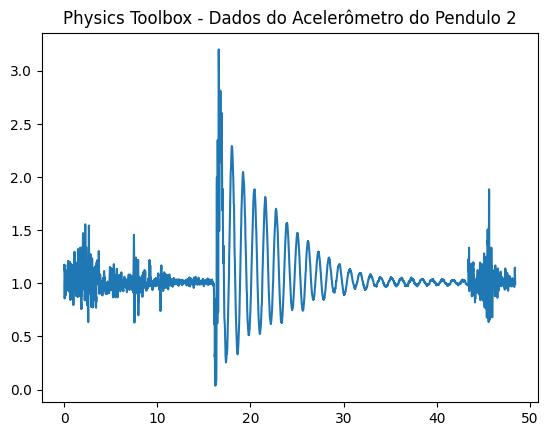

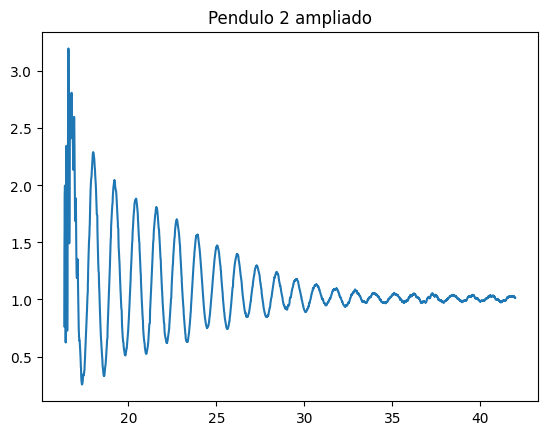

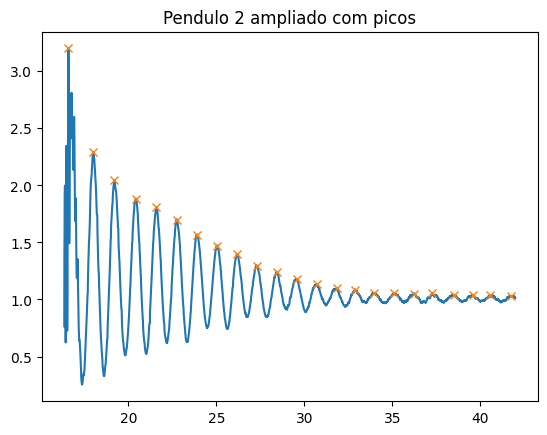

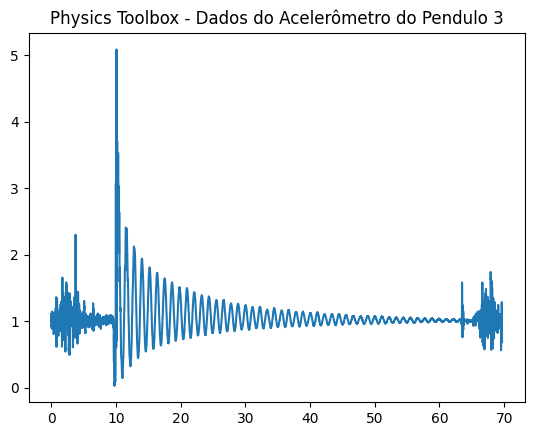

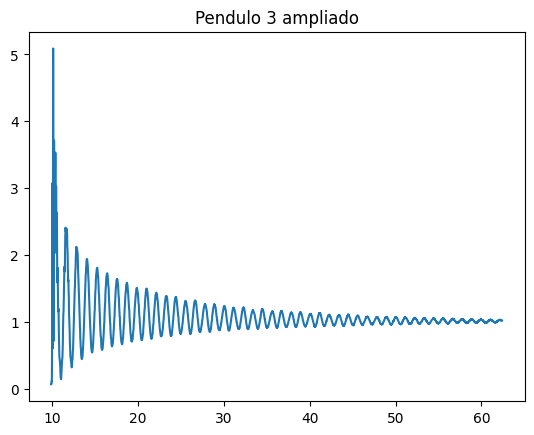

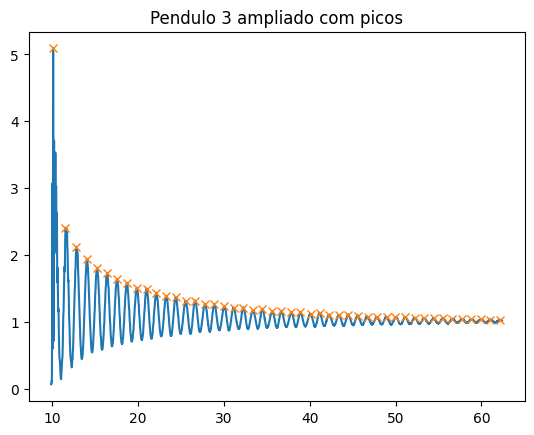

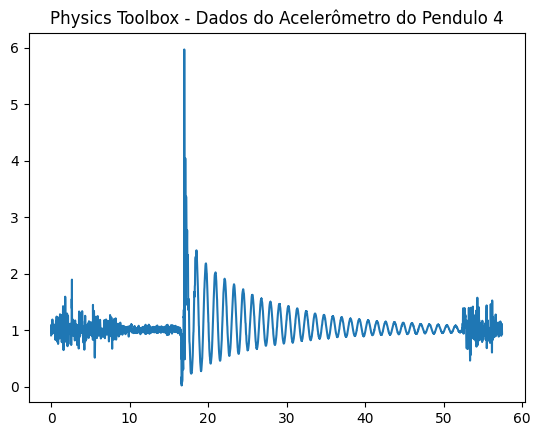

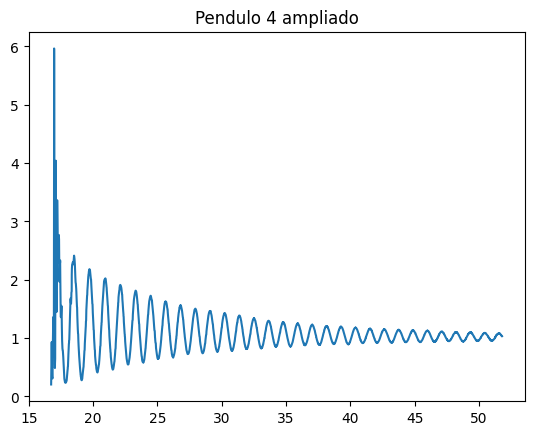

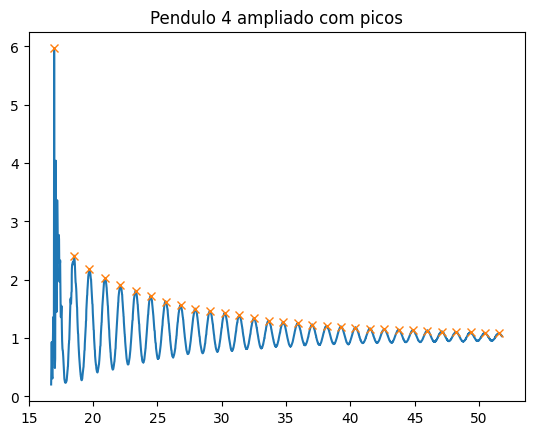

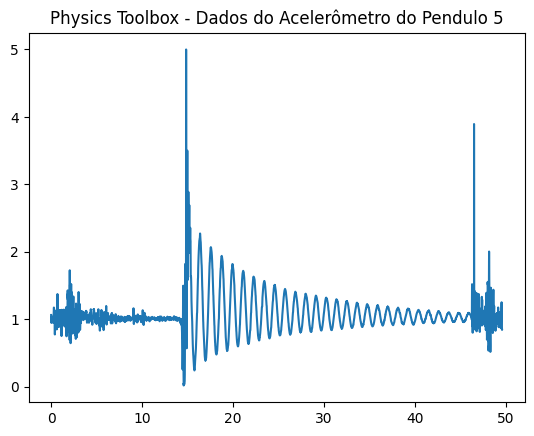

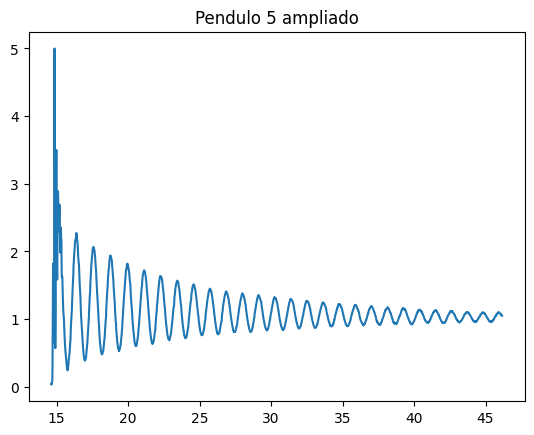

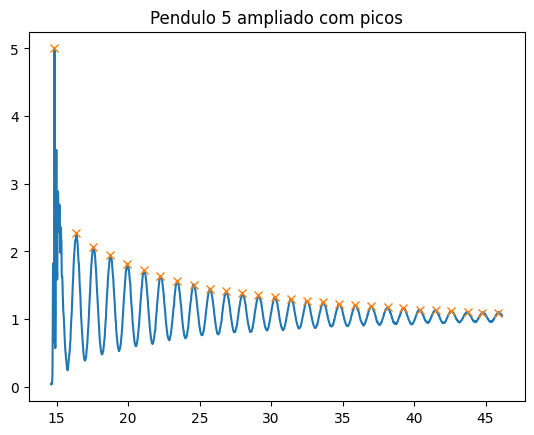

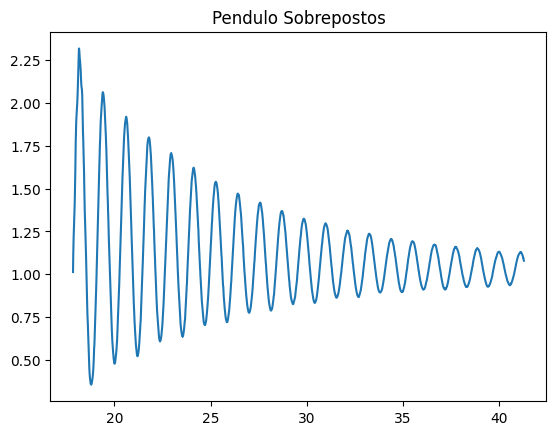





Periodo do pendulo 1 em segundos:  2.2638604157959183
Periodo do pendulo 2 em segundos:  2.287057395
Periodo do pendulo 3 em segundos:  2.2614346685217392
Periodo do pendulo 4 em segundos:  2.3039476553333333
Periodo do pendulo 5 em segundos:  2.3004351379999997
Periodo medio em segundos:  2.283347054530198 

Tempo do pendulo 1 em segundos:  55.464580186999996
Tempo do pendulo 2 em segundos:  25.157631345000002
Tempo do pendulo 3 em segundos:  52.012997376
Tempo do pendulo 4 em segundos:  34.55921483
Tempo do pendulo 5 em segundos:  31.055874362999997
Tempo medio do experimento em segundos:  39.6500596202 

Comprimento da corda em metros:  1.2951044391649493


In [ ]:
#Definir o grafico sobreposto [0] é tempo, [1] é aceleração
sobreposto = [np.zeros(10000, dtype=float), np.zeros(10000, dtype=float)]

#--------------------------------------------------------------------------------------------------------

#Imprimir os dados do acelerometro
url = 'https://raw.githubusercontent.com/felipe-rms/ModSim/372994632d9aa6b05577e7b6e4348fe5ee586cdd/ep1/Pendulo/medida1.csv'
data = pd.read_csv(url, sep=',', encoding='utf-8')
data = np.array(data)
plt.plot(data[:,0],data[:,4])
plt.title("Physics Toolbox - Dados do Acelerômetro do Pendulo 1")

#Imprimir dado do pendulo
peaks, _ = find_peaks(data[:,4], distance=150, height=3, prominence=0.01)
inicio = peaks[0] - 100
peaks, _ = find_peaks(data[inicio:,4], distance=150, height=(1,1.5), prominence=(0.01,0.055))
fim = inicio + peaks[0] + 100
plt.figure()
plt.plot(data[inicio:fim,0], data[inicio:fim,4])
plt.title("Pendulo 1 ampliado")
plt.show()
print(data[inicio:fim,4][-1])

#Imprimir dado do pendulo com picos
peaks, _ = find_peaks(data[inicio:fim,4], distance=300, height=1, prominence=0.01)
plt.figure()
plt.plot(data[inicio:fim,0], data[inicio:fim,4])
plt.plot(data[inicio:fim,0][peaks],data[inicio:fim,4][peaks],'x')
plt.title("Pendulo 1 ampliado com picos")
plt.show()

#Calculo de dados necessarios
sobreposto[0] += data[peaks[1]+inicio-135:peaks[1]+inicio+9865,0]
sobreposto[1] += data[peaks[1]+inicio-135:peaks[1]+inicio+9865,2]
periodo1 = np.average(np.diff(data[inicio:fim,0][peaks])) * 2
tempo1 = data[inicio:fim,0][peaks[-1]] - data[inicio:fim,0][peaks[0]]

#--------------------------------------------------------------------------------------------------------
printSeparador()
#--------------------------------------------------------------------------------------------------------

#Imprimir os dados do acelerometro
url = 'https://raw.githubusercontent.com/felipe-rms/ModSim/372994632d9aa6b05577e7b6e4348fe5ee586cdd/ep1/Pendulo/medida2.csv'
data = pd.read_csv(url, sep=',', encoding='utf-8')
data = np.array(data)
plt.plot(data[:,0],data[:,4])
plt.title("Physics Toolbox - Dados do Acelerômetro do Pendulo 2")

#Imprimir dado do pendulo
peaks, _ = find_peaks(data[:,4], distance=150, height=3, prominence=0.01)
inicio = peaks[0] - 100
peaks, _ = find_peaks(data[inicio:,4], distance=150, height=(1,1.5), prominence=(0.01,0.055))
fim = inicio + peaks[0] + 100
plt.figure()
plt.plot(data[inicio:fim,0], data[inicio:fim,4])
plt.title("Pendulo 2 ampliado")
plt.show()

#Imprimir dado do pendulo com picos
peaks, _ = find_peaks(data[inicio:fim,4], distance=300, height=1, prominence=0.01)
plt.figure()
plt.plot(data[inicio:fim,0], data[inicio:fim,4])
plt.plot(data[inicio:fim,0][peaks],data[inicio:fim,4][peaks],'x')
plt.title("Pendulo 2 ampliado com picos")
plt.show()

#Calculo de dados necessarios
sobreposto[0] += data[peaks[1]+inicio-135:peaks[1]+inicio+9865,0]
sobreposto[1] += data[peaks[1]+inicio-135:peaks[1]+inicio+9865,2]
periodo2 = np.average(np.diff(data[inicio:fim,0][peaks])) * 2
tempo2 = data[inicio:fim,0][peaks[-1]] - data[inicio:fim,0][peaks[0]]

#--------------------------------------------------------------------------------------------------------
printSeparador()
#--------------------------------------------------------------------------------------------------------

#Imprimir os dados do acelerometro
url = 'https://raw.githubusercontent.com/felipe-rms/ModSim/372994632d9aa6b05577e7b6e4348fe5ee586cdd/ep1/Pendulo/medida3.csv'
data = pd.read_csv(url, sep=',', encoding='utf-8')
data = np.array(data)
plt.plot(data[:,0],data[:,4])
plt.title("Physics Toolbox - Dados do Acelerômetro do Pendulo 3")

#Imprimir dado do pendulo
peaks, _ = find_peaks(data[:,4], distance=150, height=3, prominence=0.01)
inicio = peaks[0] - 100
peaks, _ = find_peaks(data[inicio:,4], distance=150, height=(1,1.1), prominence=(0.01,0.045))
fim = inicio + peaks[0] + 100
plt.figure()
plt.plot(data[inicio:fim,0], data[inicio:fim,4])
plt.title("Pendulo 3 ampliado")
plt.show()

#Imprimir dado do pendulo com picos
peaks, _ = find_peaks(data[inicio:fim,4], distance=300, height=1, prominence=0.01)
plt.figure()
plt.plot(data[inicio:fim,0], data[inicio:fim,4])
plt.plot(data[inicio:fim,0][peaks],data[inicio:fim,4][peaks],'x')
plt.title("Pendulo 3 ampliado com picos")
plt.show()

#Calculo de dados necessarios
sobreposto[0] += data[peaks[1]+inicio-135:peaks[1]+inicio+9865,0]
sobreposto[1] += data[peaks[1]+inicio-135:peaks[1]+inicio+9865,2]
periodo3 = np.average(np.diff(data[inicio:fim,0][peaks])) * 2
tempo3 = data[inicio:fim,0][peaks[-1]] - data[inicio:fim,0][peaks[0]]

#--------------------------------------------------------------------------------------------------------
printSeparador()
#--------------------------------------------------------------------------------------------------------

#Imprimir os dados do acelerometro
url = 'https://raw.githubusercontent.com/felipe-rms/ModSim/372994632d9aa6b05577e7b6e4348fe5ee586cdd/ep1/Pendulo/medida4.csv'
data = pd.read_csv(url, sep=',', encoding='utf-8')
data = np.array(data)
plt.plot(data[:,0],data[:,4])
plt.title("Physics Toolbox - Dados do Acelerômetro do Pendulo 4")

#Imprimir dado do pendulo
peaks, _ = find_peaks(data[:,4], distance=150, height=3, prominence=0.01)
inicio = peaks[0] - 100
peaks, _ = find_peaks(data[inicio:,4], distance=150, height=(1,1.1), prominence=(0.01,0.125))
fim = inicio + peaks[0] + 100
plt.figure()
plt.plot(data[inicio:fim,0], data[inicio:fim,4])
plt.title("Pendulo 4 ampliado")
plt.show()

#Imprimir dado do pendulo com picos
peaks, _ = find_peaks(data[inicio:fim,4], distance=300, height=1, prominence=0.01)
plt.figure()
plt.plot(data[inicio:fim,0], data[inicio:fim,4])
plt.plot(data[inicio:fim,0][peaks],data[inicio:fim,4][peaks],'x')
plt.title("Pendulo 4 ampliado com picos")
plt.show()

#Calculo de dados necessarios
sobreposto[0] += data[peaks[1]+inicio-135:peaks[1]+inicio+9865,0]
sobreposto[1] += data[peaks[1]+inicio-135:peaks[1]+inicio+9865,2]
periodo4 = np.average(np.diff(data[inicio:fim,0][peaks])) * 2
tempo4 = data[inicio:fim,0][peaks[-1]] - data[inicio:fim,0][peaks[0]]

#--------------------------------------------------------------------------------------------------------
printSeparador()
#--------------------------------------------------------------------------------------------------------

#Imprimir os dados do acelerometro
url = 'https://raw.githubusercontent.com/felipe-rms/ModSim/372994632d9aa6b05577e7b6e4348fe5ee586cdd/ep1/Pendulo/medida5.csv'
data = pd.read_csv(url, sep=',', encoding='utf-8')
data = np.array(data)
plt.plot(data[:,0],data[:,4])
plt.title("Physics Toolbox - Dados do Acelerômetro do Pendulo 5")

#Imprimir dado do pendulo
peaks, _ = find_peaks(data[:,4], distance=150, height=3, prominence=0.01)
inicio = peaks[0] - 100
peaks, _ = find_peaks(data[inicio:,4], distance=150, height=(1,1.2), prominence=(0.01,0.125))
fim = inicio + peaks[0] + 100
plt.figure()
plt.plot(data[inicio:fim,0], data[inicio:fim,4])
plt.title("Pendulo 5 ampliado")
plt.show()

#Imprimir dado do pendulo com picos
peaks, _ = find_peaks(data[inicio:fim,4], distance=300, height=1, prominence=0.01)
plt.figure()
plt.plot(data[inicio:fim,0], data[inicio:fim,4])
plt.plot(data[inicio:fim,0][peaks],data[inicio:fim,4][peaks],'x')
plt.title("Pendulo 5 ampliado com picos")
plt.show()

#Calculo de dados necessarios
sobreposto[0] += data[peaks[1]+inicio-135:peaks[1]+inicio+9865,0]
sobreposto[1] += data[peaks[1]+inicio-135:peaks[1]+inicio+9865,2]
periodo5 = np.average(np.diff(data[inicio:fim,0][peaks])) * 2
tempo5 = data[inicio:fim,0][peaks[-1]] - data[inicio:fim,0][peaks[0]]

#--------------------------------------------------------------------------------------------------------
printSeparador()
#--------------------------------------------------------------------------------------------------------

sobreposto[0] /= 5
sobreposto[1] /= 5
plt.figure()
plt.plot(sobreposto[0], sobreposto[1])
plt.title("Pendulo Sobrepostos")
plt.show()

#--------------------------------------------------------------------------------------------------------
printSeparador()
#--------------------------------------------------------------------------------------------------------

#Imprimir os dados
Mperiodo = (periodo1 + periodo2 + periodo3 + periodo4 + periodo5)/5
Mtempo = (tempo1 + tempo2 + tempo3 + tempo4 + tempo5)/5
Corda = (Mperiodo / (2 * math.pi))**2 * G
print("Periodo do pendulo 1 em segundos: ",periodo1)
print("Periodo do pendulo 2 em segundos: ",periodo2)
print("Periodo do pendulo 3 em segundos: ",periodo3)
print("Periodo do pendulo 4 em segundos: ",periodo4)
print("Periodo do pendulo 5 em segundos: ",periodo5)
print("Periodo medio em segundos: ",Mperiodo,"\n")
print("Tempo do pendulo 1 em segundos: ",tempo1)
print("Tempo do pendulo 2 em segundos: ",tempo2)
print("Tempo do pendulo 3 em segundos: ",tempo3)
print("Tempo do pendulo 4 em segundos: ",tempo4)
print("Tempo do pendulo 5 em segundos: ",tempo5)
print("Tempo medio do experimento em segundos: ",Mtempo,"\n")
print("Comprimento da corda em metros: ",Corda)

# Gráficos dos Dados de Experimento e Simulado

In [ ]:
#Funcoes para facilitar a mostra dos dados
def easyPlot2D(x,y,title):
  plt.figure()
  plt.plot(x,y)
  plt.title(title)
  plt.show()
    
def easyPlot3D(x,y,z,title,xl,yl,zl):
  mpl.rcParams['legend.fontsize'] = 10
  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')
  ax.plot(x, y, z, label=title)
  ax.set_xlabel(xl)
  ax.set_ylabel(yl)
  ax.set_zlabel(zl)
  ax.legend()
  plt.show()

In [ ]:
#Funcoes dos vetores de estado
def initStateVector(s):
  return(np.array(s))

def initSVTrajectory():
  return([])

def updateSVTrajectory(svt,s):
  svt.append(s)
  return(svt)

def extractSVTrajectory(svt,i):
  foo = np.array(svt)
  return(foo[:,i])

#Formulas
def Fd(v):
  return K*v/M

#Experimental
def updateStateVectorExperimental(s,id):
  dt = sobreposto[0][id+1] - sobreposto[0][id]
  theta_e = s[0] + s[1] * dt
  a_e = math.sqrt(abs((sobreposto[1][id]-1)*G - Fd(s[1])*s[1]*G) / Corda) * ((sobreposto[1][id]-1)*G - Fd(s[1])*s[1]*G) / abs((sobreposto[1][id]-1)*G - Fd(s[1])*s[1]*G)
  v_e = (s[1] + a_e * dt)
  x_e = Corda * math.sin(theta_e)
  y_e = -Corda * math.cos(theta_e)
  t_e = s[5] + dt
  return(np.array([theta_e,v_e,a_e,x_e,y_e,t_e]))

#Experimental 2
def updateSVE(s, id):
  dt = sobreposto[0][id+1] - sobreposto[0][id]
  x_e = s[0] + s[2] * dt
  y_e = s[1] + s[3] * dt
  vx_e = s[2] + sobreposto[1][id]*(-s[0]/Corda) * dt
  vy_e = s[3] + (sobreposto[1][id]*(-s[1]/Corda) - 1) * dt
  return (np.array([x_e, y_e, vx_e, vy_e, s[4] + dt]))


#Simulação com Euler
def updateStateVectorEuler(s,dt):
  return(s + rates(s,dt))

def rates(s,dt):
  r0 = s[1] * dt #movimento do angulo
  r1 = ((-1 * G / Corda) * math.sin(s[0]) - Fd(s[1])) * dt #mudança de velocidade angular
  r2 = ((-1 * G / Corda) * math.sin(s[0]) - Fd(s[1])) - s[2] #aceleração agular
  r3 = Corda * math.sin(s[0]) - s[3] #posição X do objeto
  r4 = -Corda * math.cos(s[0]) - s[4] #posição Y do objeto
  r5 = dt #mudança de tempo
  return(np.array([r0,r1,r2,r3,r4,r5]))

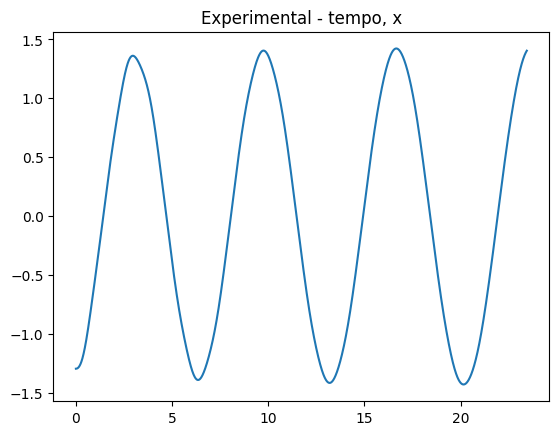

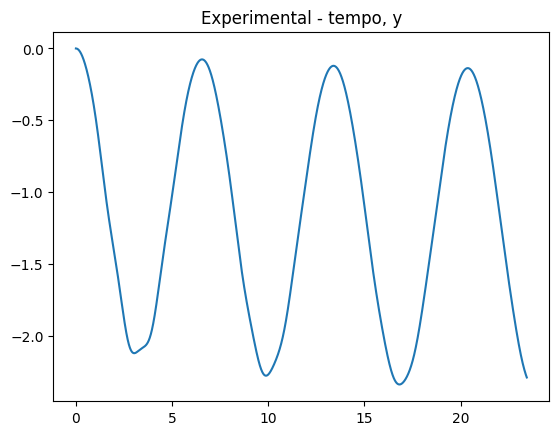

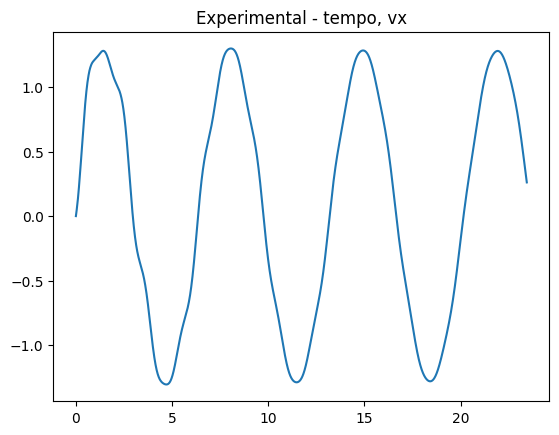

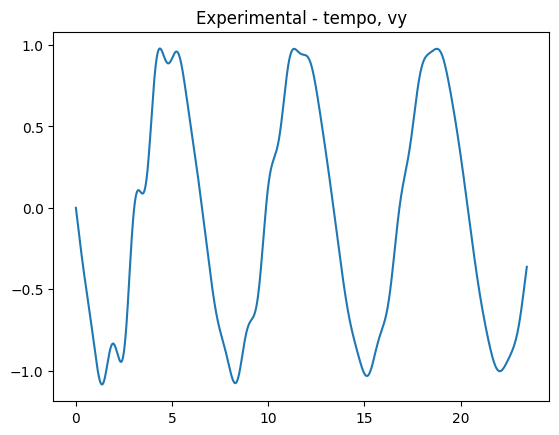

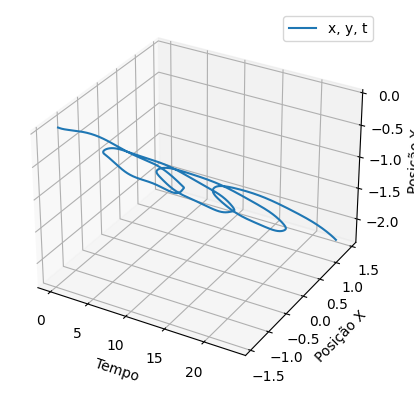

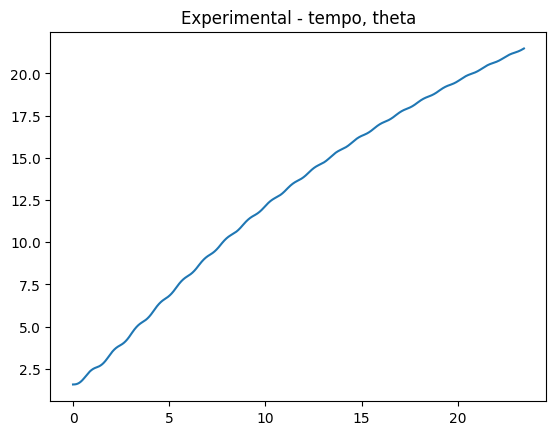

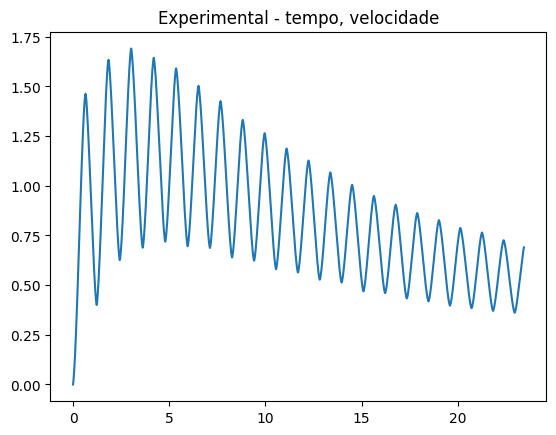

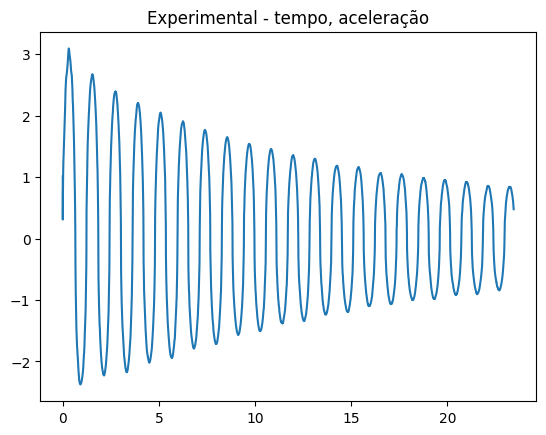

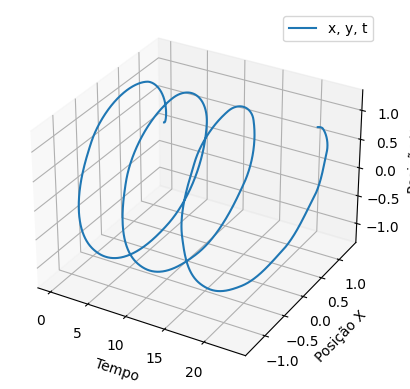

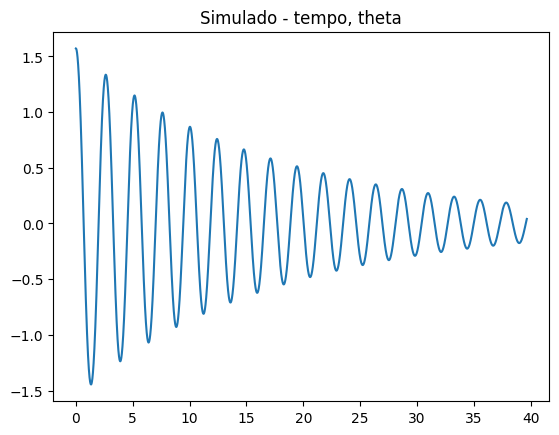

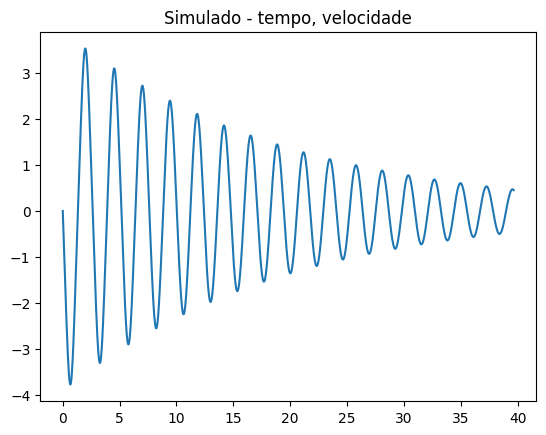

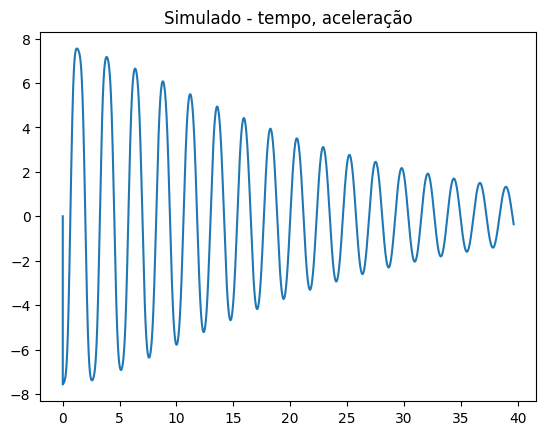

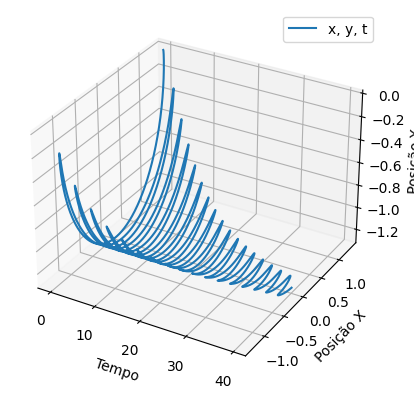

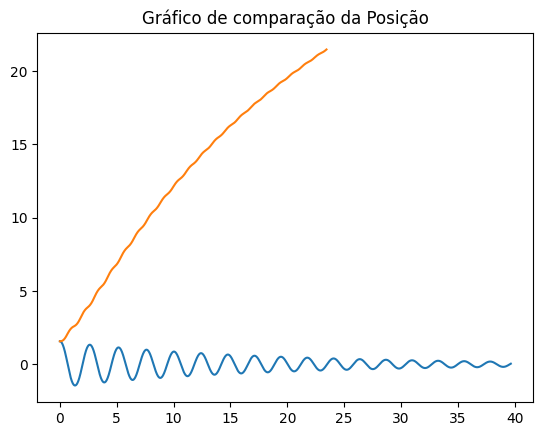

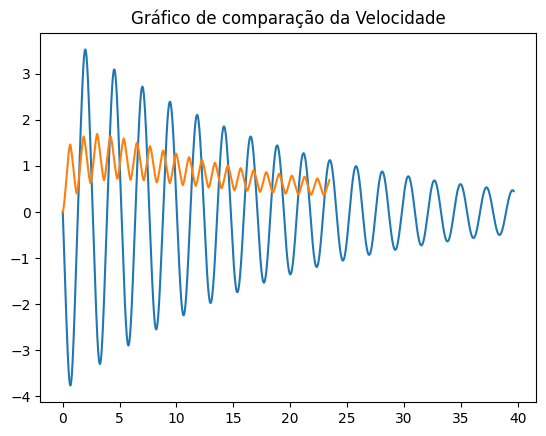

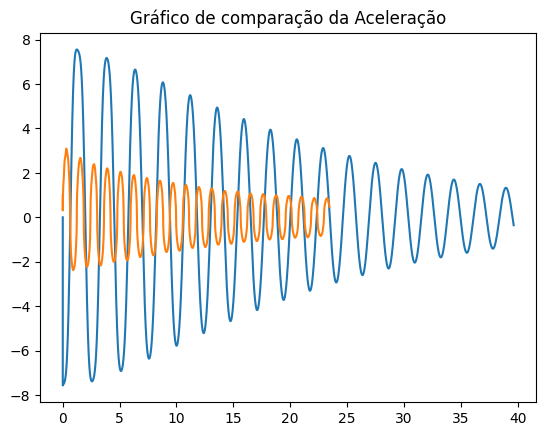

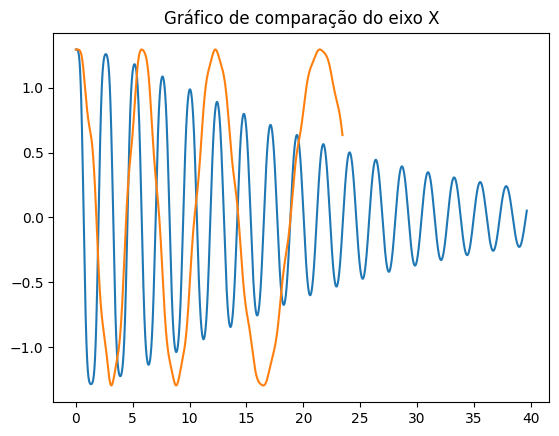

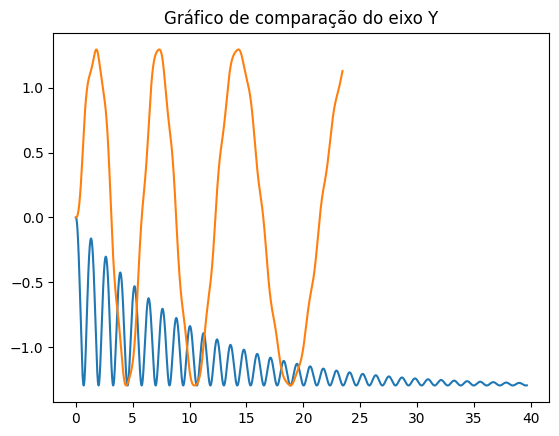

In [ ]:
def main():
  #Dados Experimentais
  theta_e = math.pi / 2
  v_e = 0
  a_e = sobreposto[1][0]
  x_e = Corda
  y_e = 0
  t_e = 0
  stateVectorExperimental = initStateVector([theta_e,v_e,a_e,x_e,y_e,t_e])
  svtExperimental = initSVTrajectory() 

  svExp = initStateVector([-Corda, 0, 0, 0, 0])
  svE = initSVTrajectory()

  for i in range(0,9999):
    svE = updateSVTrajectory(svE, list(svExp))
    svExp = updateSVE(svExp, i)
    svtExperimental = updateSVTrajectory(svtExperimental,list(stateVectorExperimental))
    stateVectorExperimental = updateStateVectorExperimental(stateVectorExperimental,i)

  vtheta_e = extractSVTrajectory(svtExperimental,0)
  vv_e = extractSVTrajectory(svtExperimental,1)
  va_e = extractSVTrajectory(svtExperimental,2)
  vx_e = extractSVTrajectory(svtExperimental,3)
  vy_e = extractSVTrajectory(svtExperimental,4)
  vt_e = extractSVTrajectory(svtExperimental,5)

  mbat = extractSVTrajectory(svE, 4)
  mbax = extractSVTrajectory(svE, 0)
  mbay = extractSVTrajectory(svE, 1)
  vmbax = extractSVTrajectory(svE, 2)
  vmbay = extractSVTrajectory(svE, 3)

  easyPlot2D(mbat, mbax, 'Experimental - tempo, x')
  easyPlot2D(mbat, mbay, 'Experimental - tempo, y')
  easyPlot2D(mbat, vmbax, 'Experimental - tempo, vx')
  easyPlot2D(mbat, vmbay, 'Experimental - tempo, vy')
  easyPlot3D(mbat, mbax, mbay, 'x, y, t', 'Tempo', 'Posição X', 'Posição Y')



  easyPlot2D(vt_e, vtheta_e, 'Experimental - tempo, theta')
  easyPlot2D(vt_e, vv_e, 'Experimental - tempo, velocidade')
  easyPlot2D(vt_e, va_e, 'Experimental - tempo, aceleração')
  easyPlot3D(vt_e, vx_e, vy_e, 'x, y, t', 'Tempo', 'Posição X', 'Posição Y')

  #--------------------------------------------------------------------------------------------------------
  printSeparador()
  #--------------------------------------------------------------------------------------------------------

  #Tempo da Simulacao
  t_s = 0
  tf = Mtempo
  dt = 0.0001

  #Dados Simulados com Euler
  theta_s = math.pi / 2
  v_s = 0
  a_s = 0
  x_s = Corda
  y_s = 0
  stateVectorEuler = initStateVector([theta_s,v_s,a_s,x_s,y_s,t_s])
  svtEuler = initSVTrajectory() 
  
  while (stateVectorEuler[5]<tf):
    svtvEuler = updateSVTrajectory(svtEuler,list(stateVectorEuler))
    stateVectorEuler = updateStateVectorEuler(stateVectorEuler,dt)

  vtheta_s = extractSVTrajectory(svtEuler,0)
  vv_s = extractSVTrajectory(svtEuler,1)
  va_s = extractSVTrajectory(svtEuler,2)
  vx_s = extractSVTrajectory(svtEuler,3)
  vy_s = extractSVTrajectory(svtEuler,4)
  vt_s = extractSVTrajectory(svtEuler,5)

  easyPlot2D(vt_s, vtheta_s, 'Simulado - tempo, theta')
  easyPlot2D(vt_s, vv_s, 'Simulado - tempo, velocidade')
  easyPlot2D(vt_s, va_s, 'Simulado - tempo, aceleração')
  easyPlot3D(vt_s, vx_s, vy_s, 'x, y, t', 'Tempo', 'Posição X', 'Posição Y')

  #--------------------------------------------------------------------------------------------------------
  printSeparador()
  #--------------------------------------------------------------------------------------------------------

  #Comparação
  plt.figure()
  plt.plot(vt_s, vtheta_s)
  plt.plot(vt_e, vtheta_e)
  plt.title("Gráfico de comparação da Posição")
  plt.show()

  plt.figure()
  plt.plot(vt_s, vv_s)
  plt.plot(vt_e, vv_e)
  plt.title("Gráfico de comparação da Velocidade")
  plt.show()

  plt.figure()
  plt.plot(vt_s, va_s)
  plt.plot(vt_e, va_e)
  plt.title("Gráfico de comparação da Aceleração")
  plt.show()

  plt.figure()
  plt.plot(vt_s, vx_s)
  plt.plot(vt_e, vx_e)
  plt.title("Gráfico de comparação do eixo X")
  plt.show()

  plt.figure()
  plt.plot(vt_s, vy_s)
  plt.plot(vt_e, vy_e)
  plt.title("Gráfico de comparação do eixo Y")
  plt.show()

main() 